### Import

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.api import OLS, add_constant

### Read Data

In [152]:
df = pd.read_csv("TG_STAID002759.txt")

### Rename Colummns

In [153]:
df.columns = ["Souid", "Date", "TG", "Q_TG"]

### Convert to datetime

In [154]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d')

In [155]:
df.set_index("Date", inplace=True)

In [156]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day


### Handle Outliers

In [157]:
df.loc['1945-04-25':'1945-11-05', 'TG'] = (df['1946-04-25':'1946-11-05']["TG"].values
                                           + df['1944-04-25':'1944-11-05']["TG"].values) / 2
df["Q_TG"].loc[df['Q_TG'] == 9] = 1

c:\users\bastian matzen\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [158]:
# Create a timestep variable
df['timestep'] = np.arange(1, len(df)+1)

# Create a squared timestep variable as well
df['timestep^2'] = df['timestep']**2
df.head()

,Souid,TG,Q_TG,year,month,day,timestep,timestep^2
Date,,,,,,,,
1876-01-01,127488,22.0,0,1876,1,1,1,1
1876-01-02,127488,25.0,0,1876,1,2,2,4
1876-01-03,127488,3.0,0,1876,1,3,3,9
1876-01-04,127488,-58.0,0,1876,1,4,4,16
1876-01-05,127488,-98.0,0,1876,1,5,5,25


In [159]:
# fit the model
X = add_constant(df['timestep'])
X_sq = add_constant(df[['timestep', 'timestep^2']])
X.head()

,const,timestep
Date,,
1876-01-01,1.0,1
1876-01-02,1.0,2
1876-01-03,1.0,3
1876-01-04,1.0,4
1876-01-05,1.0,5


In [160]:
y = df['TG']

In [161]:
# Create a model with the timestep only
m = OLS(y, X) # OLS stands for ordinary least squares and it is a method
# to solve a linear regression
results = m.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TG   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     204.7
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           2.45e-46
Time:                        11:41:33   Log-Likelihood:            -3.0523e+05
No. Observations:               52777   AIC:                         6.105e+05
Df Residuals:                   52775   BIC:                         6.105e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.4851      0.684    124.924      0.000      84.144      86.826
timestep       0.0003   2.25e-05     14.306      0.000       0.000       0.000
==============================================================================
Omnibus:                     1896.408   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              971.764
Skew:                          -0.142   Prob(JB):                    9.64e-212
Kurtosis:                       2.399   Cond. No.                     6.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
# Create a model with the squared timestep
m_sq = OLS(y, X_sq)
results_sq = m_sq.fit()
results_sq.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TG   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     110.8
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           9.29e-49
Time:                        11:41:33   Log-Likelihood:            -3.0522e+05
No. Observations:               52777   AIC:                         6.104e+05
Df Residuals:                   52774   BIC:                         6.105e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.0206      0.696    123.513      0.000      84.656      87.386
timestep       0.0003   2.25e-05     14.337      0.000       0.000       0.000
timestep^2 -1.367e-09   3.32e-10     -4.116      0.000   -2.02e-09   -7.16e-10
==============================================================================
Omnibus:                     1906.235   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              974.799
Skew:                          -0.142   Prob(JB):                    2.11e-212
Kurtosis:                       2.397   Cond. No.                     2.25e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Transform to Kelvin


In [163]:
df["TG"] /= 10
#df["TG"] +=  273.15

### Plot

In [164]:
#Set Plot Size
rcParams['figure.figsize'] = 16,9

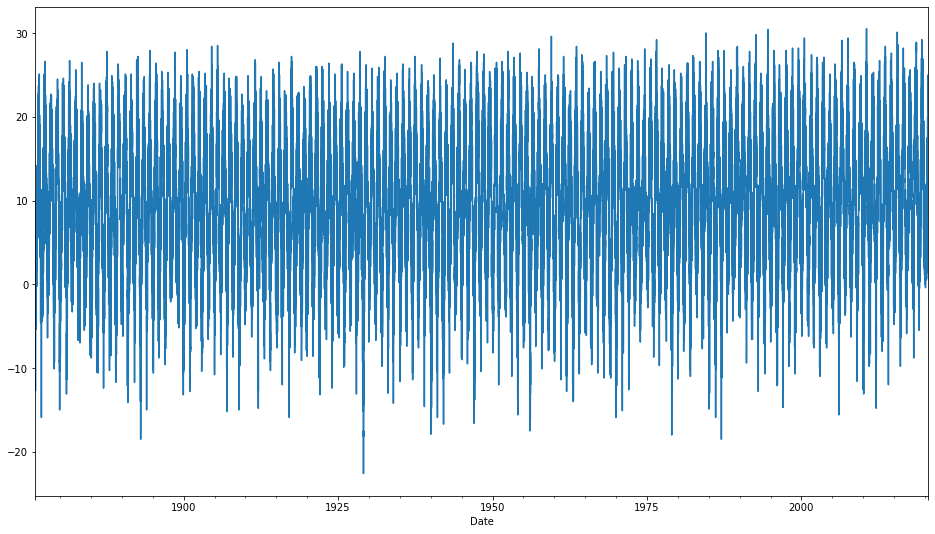

In [165]:
#df["TG"].loc["1946"].plot()
df["TG"].plot()

In [166]:
df["daily_means"] = df.groupby("year")["TG"].transform("mean")
df["daily_means"].loc[(df["day"] == 1) & (df["month"] == 1)]

Date
1876-01-01     9.320219
1877-01-01     9.727945
1878-01-01    10.236712
1879-01-01     8.180548
1880-01-01     9.805191
                ...    
2016-01-01    10.832787
2017-01-01    10.712055
2018-01-01    11.755616
2019-01-01    11.824384
2020-01-01    10.054396
Name: daily_means, Length: 145, dtype: float64

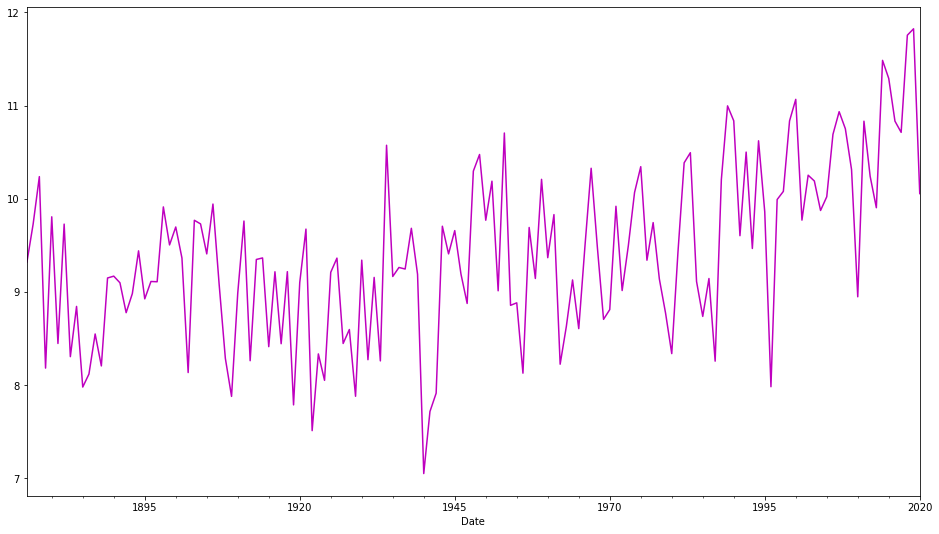

In [167]:
df["daily_means"].loc[(df["day"] == 1) & (df["month"] == 1)].plot(color="m")

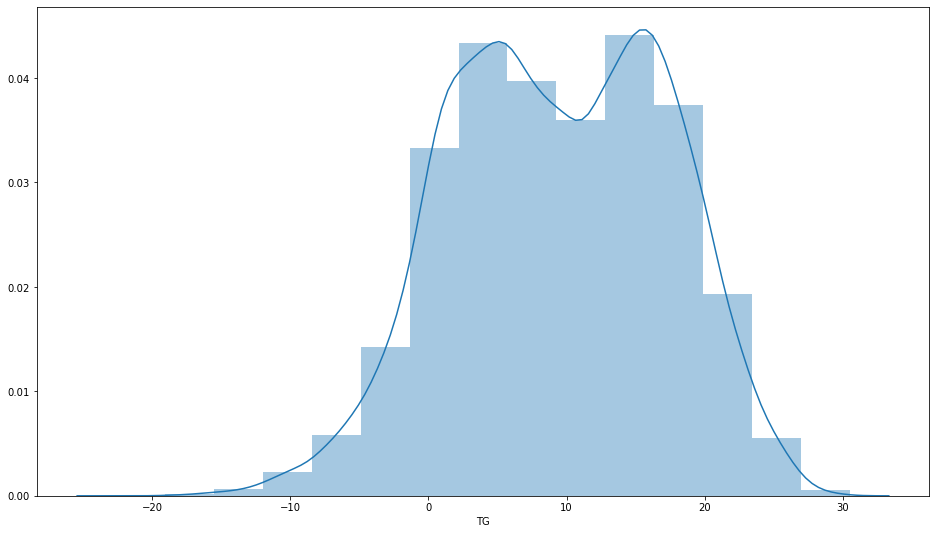

In [168]:
sns.distplot(df.TG, bins=15)

In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive decomposition
seasonal = seasonal_decompose(df['TG'])

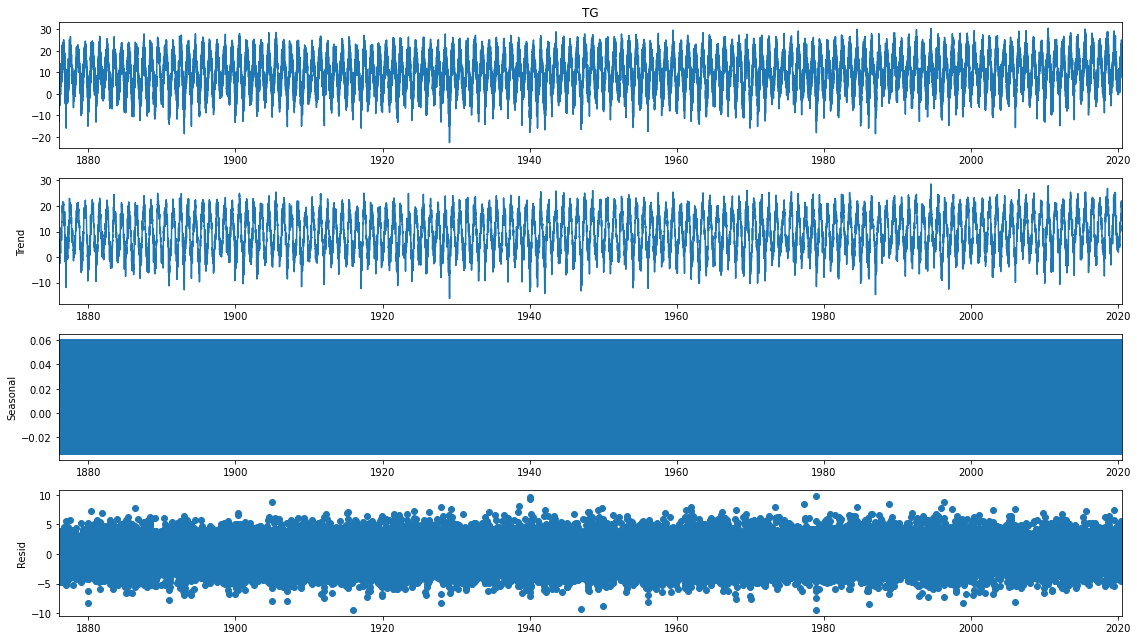

In [170]:

seasonal.plot()
plt.show()

### Train Test Split

In [171]:
y_train = df[:'2019'].copy()
y_test = df['2020'].copy()

### Detrend time series Data

In [172]:
y_train["difference"] = y_train["TG"].diff().fillna(0.0)
y_train["difference"]

Date
1876-01-01    0.0
1876-01-02    0.3
1876-01-03   -2.2
1876-01-04   -6.1
1876-01-05   -4.0
             ... 
2019-12-27   -1.8
2019-12-28   -1.8
2019-12-29   -1.3
2019-12-30    4.5
2019-12-31    1.5
Name: difference, Length: 52595, dtype: float64

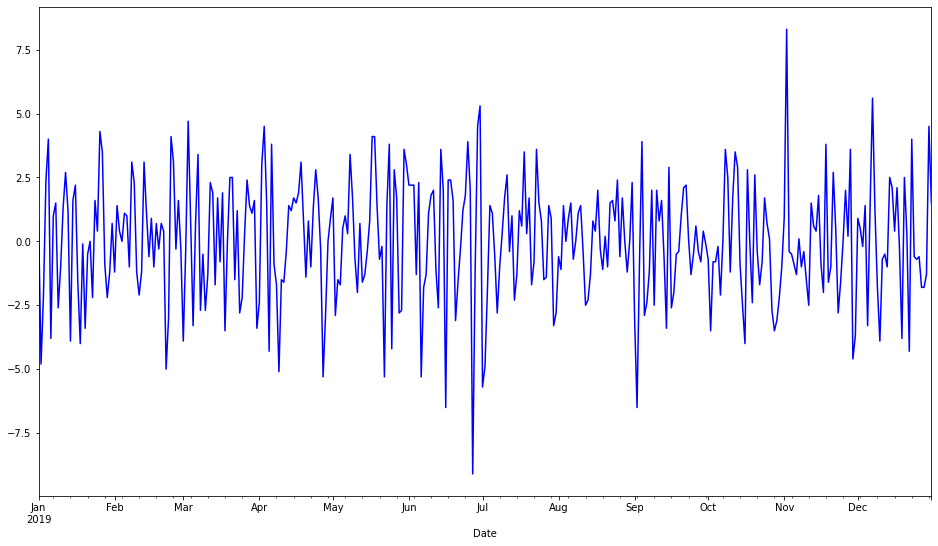

In [173]:
y_train["difference"].loc["2019"].plot(color="b")
#y_train["difference"].plot(color="m")

### De-seasonalize the series by subtracting daily means

In [174]:
y_train["daily_means"] = y_train.groupby("day")["difference"].transform("mean")
y_train["daily_means"]

Date
1876-01-01   -0.062355
1876-01-02    0.032697
1876-01-03    0.023553
1876-01-04    0.063339
1876-01-05   -0.014959
                ...   
2019-12-27   -0.049566
2019-12-28    0.134433
2019-12-29    0.003552
2019-12-30    0.020076
2019-12-31   -0.039385
Name: daily_means, Length: 52595, dtype: float64

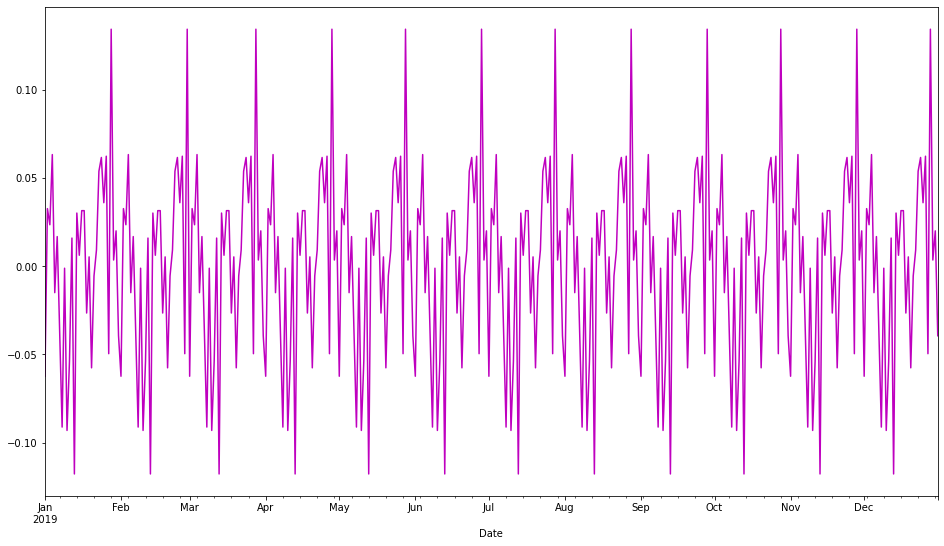

In [175]:
y_train["daily_means"].loc["2019"].plot(color="m")

In [176]:

y_train["deseasonalized"] = y_train["difference"] - y_train["daily_means"]
y_train['deseasonalized']

Date
1876-01-01    0.062355
1876-01-02    0.267303
1876-01-03   -2.223553
1876-01-04   -6.163339
1876-01-05   -3.985041
                ...   
2019-12-27   -1.750434
2019-12-28   -1.934433
2019-12-29   -1.303552
2019-12-30    4.479924
2019-12-31    1.539385
Name: deseasonalized, Length: 52595, dtype: float64

## 1) The mean of the time series

In [177]:
# Add the mean value of passengers as prediction for y_test
y_test['y_pred_mean'] = y_train['TG'].mean()

In [178]:
# Define a function that plots the forecast for us
def plot_forecast(y_train, y_test, columns):
    '''
    Plots forecasts of passenger data

    Params:
    -------
    y_train: The training data
    y_test: The test data
    columns: Name of the prediction columns form a DataFrame

    '''
    # Plot the actual values
    y_train.TG.plot(label='Training Data')
    y_test.TG.plot(label=('Test Data'))

    # Plot each prediction
    for column in columns:
        y_test[column].plot(label=column)

    # General settings
    plt.title('Temperature per day over Time', fontsize=15)
    plt.ylabel('Temperature', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend()
    # plt.savefig('mean_baseline.png')
    plt.show()

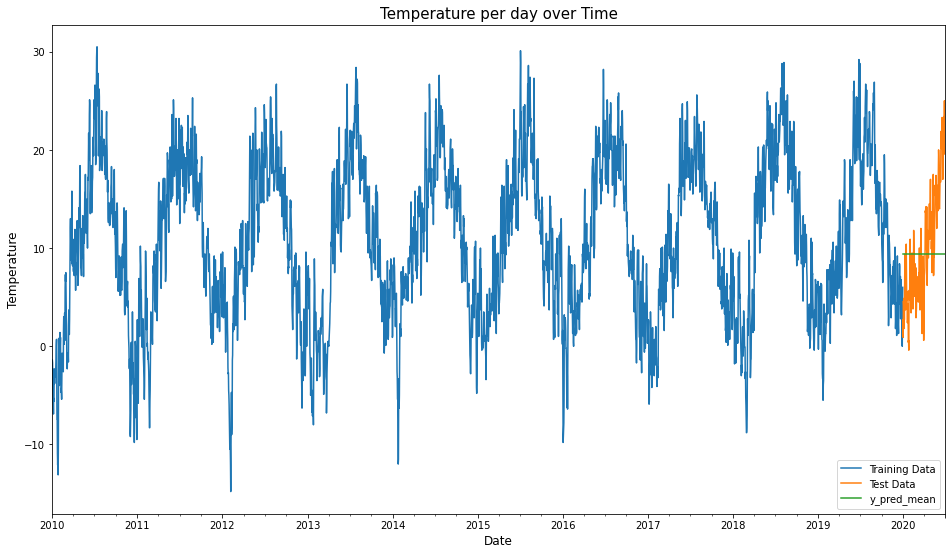

In [179]:
# Plot the forecast
plot_forecast(y_train["2010":], y_test, ['y_pred_mean'])


Predicting the mean does not make sense for a time series with trend.
What if we instead use the mean difference?

## 2) The mean of the detrended time series

In [180]:
# Take the mean percentage change
y_test['y_pred_mean_pct_change'] = y_train['difference'].mean()

### Convert the prediction back to temperature

In [181]:
# Add 1 to y_pred_mean_diff
y_test['y_pred_mean_pct_change'] += 1

In [182]:
y_test['y_pred_mean_pct_change'].head(50)

Date
2020-01-01    1.000072
2020-01-02    1.000072
2020-01-03    1.000072
2020-01-04    1.000072
2020-01-05    1.000072
2020-01-06    1.000072
2020-01-07    1.000072
2020-01-08    1.000072
2020-01-09    1.000072
2020-01-10    1.000072
2020-01-11    1.000072
2020-01-12    1.000072
2020-01-13    1.000072
2020-01-14    1.000072
2020-01-15    1.000072
2020-01-16    1.000072
2020-01-17    1.000072
2020-01-18    1.000072
2020-01-19    1.000072
2020-01-20    1.000072
2020-01-21    1.000072
2020-01-22    1.000072
2020-01-23    1.000072
2020-01-24    1.000072
2020-01-25    1.000072
2020-01-26    1.000072
2020-01-27    1.000072
2020-01-28    1.000072
2020-01-29    1.000072
2020-01-30    1.000072
2020-01-31    1.000072
2020-02-01    1.000072
2020-02-02    1.000072
2020-02-03    1.000072
2020-02-04    1.000072
2020-02-05    1.000072
2020-02-06    1.000072
2020-02-07    1.000072
2020-02-08    1.000072
2020-02-09    1.000072
2020-02-10    1.000072
2020-02-11    1.000072
2020-02-12    1.000072
2020-0

In [183]:
# Take the cumulative product of the series
y_test['y_pred_mean_pct_change'] = np.cumprod(y_test['y_pred_mean_pct_change'])

In [184]:

# Take the last actual observation as starting point
last_observation = y_train['TG'][-1]

y_test['y_pred_mean_pct_change'] *= last_observation
y_test.head()

,Souid,TG,Q_TG,year,month,day,timestep,timestep^2,daily_means,y_pred_mean,y_pred_mean_pct_change
Date,,,,,,,,,,,
2020-01-01,111448,2.7,0,2020,1,1,52596,-1528628080,10.054396,9.394023,6.000434
2020-01-02,111448,0.9,0,2020,1,2,52597,-1528522887,10.054396,9.394023,6.000867
2020-01-03,111448,4.6,0,2020,1,3,52598,-1528417692,10.054396,9.394023,6.001301
2020-01-04,111448,4.2,0,2020,1,4,52599,-1528312495,10.054396,9.394023,6.001734
2020-01-05,111448,1.8,0,2020,1,5,52600,-1528207296,10.054396,9.394023,6.002168


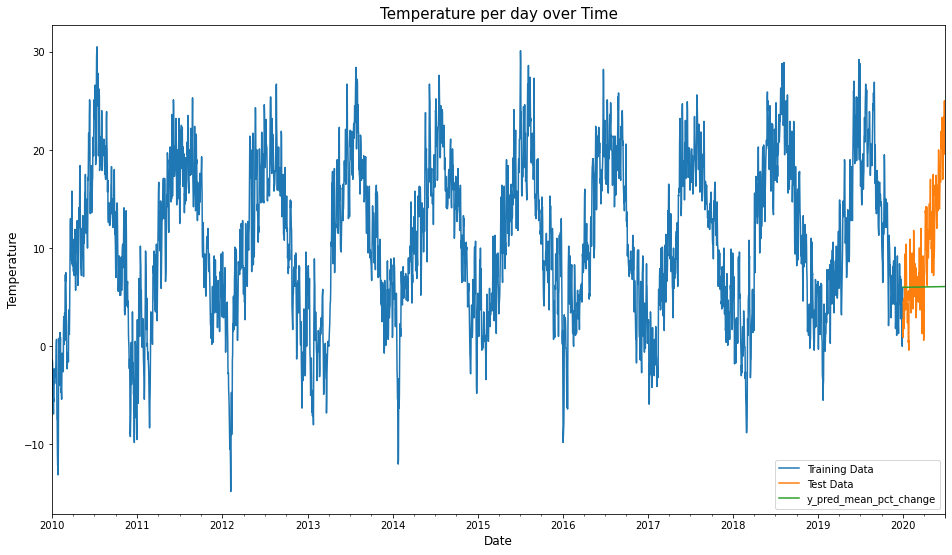

In [185]:
# Plot the forecast
plot_forecast(y_train["2010":], y_test, ['y_pred_mean_pct_change'])


## 3) The seasonal means of the time series

In [186]:
y_train["daily_mean_temp"] = y_train.groupby('day')['TG'].transform('mean')
y_train["daily_mean_temp"].values


array([ 9.43298611,  9.46568287,  9.48923611, ...,  9.98594812,
       10.17105429,  9.51299603])

In [187]:

y_test["daily_mean_temp"] = y_train["daily_mean_temp"][:len(y_test)].values
y_test["daily_mean_temp"]

Date
2020-01-01     9.432986
2020-01-02     9.465683
2020-01-03     9.489236
2020-01-04     9.552575
2020-01-05     9.537616
                ...    
2020-06-26     9.413918
2020-06-27     9.364352
2020-06-28     9.498785
2020-06-29     9.985948
2020-06-30    10.171054
Name: daily_mean_temp, Length: 182, dtype: float64

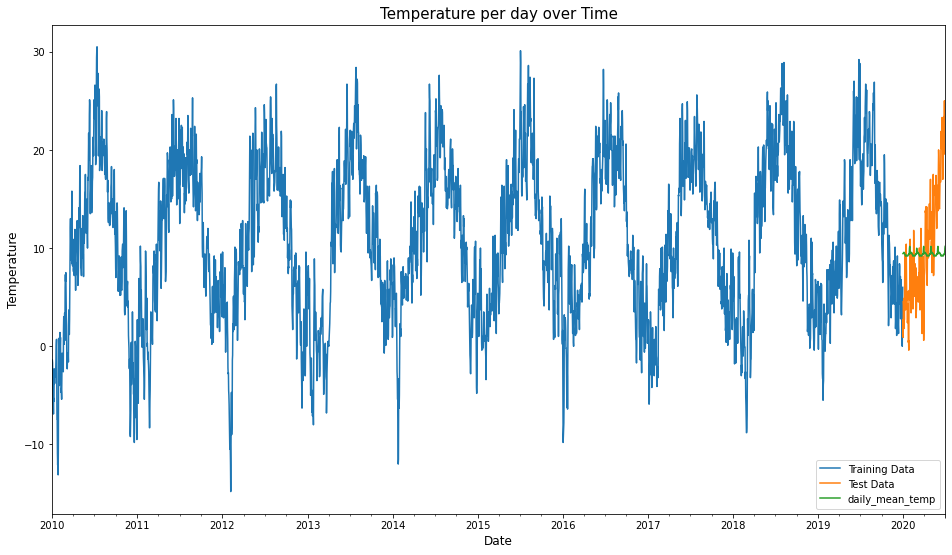

In [188]:
plot_forecast(y_train["2010":], y_test, ['daily_mean_temp'])

## 4) The seasonal means of the de-trended time series

In [189]:
# Take the daily means of the difference
y_train["daily_mean_pct"] = y_train.groupby('day')['difference'].transform('mean')
y_train["daily_mean_pct"].values


array([-0.06235532,  0.03269676,  0.02355324, ...,  0.00355158,
        0.02007576, -0.03938492])

In [190]:
# Create a new column containing the monthly mean percentage changes
y_test["y_pred_daily_mean_pct"] = y_train["daily_mean_pct"][:len(y_test)].values
y_test["y_pred_daily_mean_pct"]

Date
2020-01-01   -0.062355
2020-01-02    0.032697
2020-01-03    0.023553
2020-01-04    0.063339
2020-01-05   -0.014959
                ...   
2020-06-26    0.062413
2020-06-27   -0.049566
2020-06-28    0.134433
2020-06-29    0.003552
2020-06-30    0.020076
Name: y_pred_daily_mean_pct, Length: 182, dtype: float64

In [191]:
# Add 1 to that value
y_test['y_pred_daily_mean_pct'] += 1
y_test.head()

,Souid,TG,Q_TG,year,month,day,timestep,timestep^2,daily_means,y_pred_mean,y_pred_mean_pct_change,daily_mean_temp,y_pred_daily_mean_pct
Date,,,,,,,,,,,,,
2020-01-01,111448,2.7,0,2020,1,1,52596,-1528628080,10.054396,9.394023,6.000434,9.432986,0.937645
2020-01-02,111448,0.9,0,2020,1,2,52597,-1528522887,10.054396,9.394023,6.000867,9.465683,1.032697
2020-01-03,111448,4.6,0,2020,1,3,52598,-1528417692,10.054396,9.394023,6.001301,9.489236,1.023553
2020-01-04,111448,4.2,0,2020,1,4,52599,-1528312495,10.054396,9.394023,6.001734,9.552575,1.063339
2020-01-05,111448,1.8,0,2020,1,5,52600,-1528207296,10.054396,9.394023,6.002168,9.537616,0.985041


In [192]:
# Take the cumulative product
y_test['y_pred_daily_mean_pct'] = np.cumprod(y_test['y_pred_daily_mean_pct'])
y_test['y_pred_daily_mean_pct']

Date
2020-01-01    0.937645
2020-01-02    0.968303
2020-01-03    0.991109
2020-01-04    1.053885
2020-01-05    1.038120
                ...   
2020-06-26    0.715262
2020-06-27    0.679809
2020-06-28    0.771198
2020-06-29    0.773937
2020-06-30    0.789474
Name: y_pred_daily_mean_pct, Length: 182, dtype: float64

In [193]:
# Multiply the last observed passenger number
y_test['y_pred_daily_mean_pct'] *= last_observation
y_test.head()

,Souid,TG,Q_TG,year,month,day,timestep,timestep^2,daily_means,y_pred_mean,y_pred_mean_pct_change,daily_mean_temp,y_pred_daily_mean_pct
Date,,,,,,,,,,,,,
2020-01-01,111448,2.7,0,2020,1,1,52596,-1528628080,10.054396,9.394023,6.000434,9.432986,5.625868
2020-01-02,111448,0.9,0,2020,1,2,52597,-1528522887,10.054396,9.394023,6.000867,9.465683,5.809816
2020-01-03,111448,4.6,0,2020,1,3,52598,-1528417692,10.054396,9.394023,6.001301,9.489236,5.946656
2020-01-04,111448,4.2,0,2020,1,4,52599,-1528312495,10.054396,9.394023,6.001734,9.552575,6.323312
2020-01-05,111448,1.8,0,2020,1,5,52600,-1528207296,10.054396,9.394023,6.002168,9.537616,6.228718


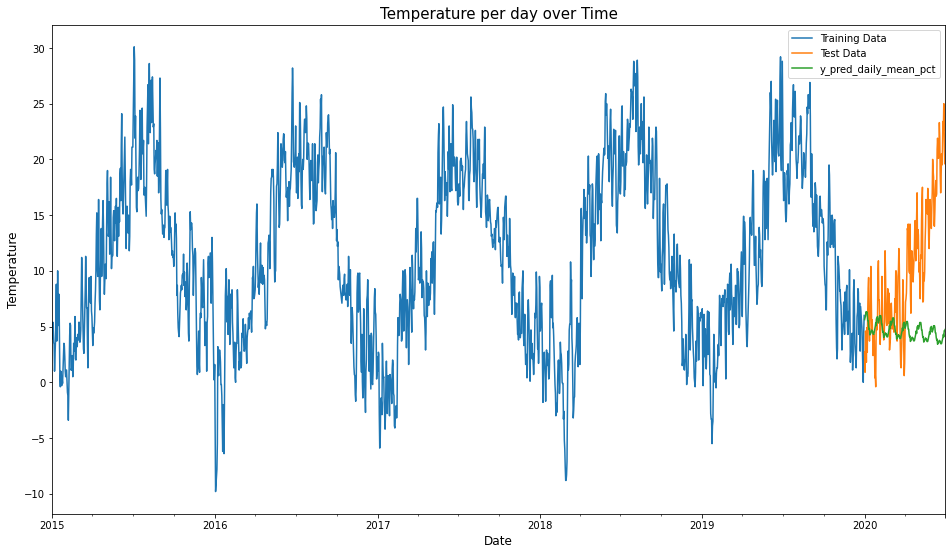

In [194]:
# Plot the forecast
plot_forecast(y_train["2015":], y_test, ['y_pred_daily_mean_pct'])

## Persistence Forecast

In [195]:
# Always predict the last observed value
y_test['y_pred_persistence'] = y_test['TG'].shift()
y_test.head()

,Souid,TG,Q_TG,year,month,day,timestep,timestep^2,daily_means,y_pred_mean,y_pred_mean_pct_change,daily_mean_temp,y_pred_daily_mean_pct,y_pred_persistence
Date,,,,,,,,,,,,,,
2020-01-01,111448,2.7,0,2020,1,1,52596,-1528628080,10.054396,9.394023,6.000434,9.432986,5.625868,NaN
2020-01-02,111448,0.9,0,2020,1,2,52597,-1528522887,10.054396,9.394023,6.000867,9.465683,5.809816,2.7
2020-01-03,111448,4.6,0,2020,1,3,52598,-1528417692,10.054396,9.394023,6.001301,9.489236,5.946656,0.9
2020-01-04,111448,4.2,0,2020,1,4,52599,-1528312495,10.054396,9.394023,6.001734,9.552575,6.323312,4.6
2020-01-05,111448,1.8,0,2020,1,5,52600,-1528207296,10.054396,9.394023,6.002168,9.537616,6.228718,4.2


In [196]:
#Impute NaN from last observation in training set
y_test['y_pred_persistence'].iloc[0] = last_observation
y_test

c:\users\bastian matzen\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Souid,TG,Q_TG,year,month,day,timestep,timestep^2,daily_means,y_pred_mean,y_pred_mean_pct_change,daily_mean_temp,y_pred_daily_mean_pct,y_pred_persistence
Date,,,,,,,,,,,,,,
2020-01-01,111448,2.7,0,2020,1,1,52596,-1528628080,10.054396,9.394023,6.000434,9.432986,5.625868,6.0
2020-01-02,111448,0.9,0,2020,1,2,52597,-1528522887,10.054396,9.394023,6.000867,9.465683,5.809816,2.7
2020-01-03,111448,4.6,0,2020,1,3,52598,-1528417692,10.054396,9.394023,6.001301,9.489236,5.946656,0.9
2020-01-04,111448,4.2,0,2020,1,4,52599,-1528312495,10.054396,9.394023,6.001734,9.552575,6.323312,4.6
2020-01-05,111448,1.8,0,2020,1,5,52600,-1528207296,10.054396,9.394023,6.002168,9.537616,6.228718,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,111448,22.6,0,2020,6,26,52773,-1509977767,10.054396,9.394023,6.077659,9.413918,4.291571,23.4
2020-06-27,111448,25.0,0,2020,6,27,52774,-1509872220,10.054396,9.394023,6.078098,9.364352,4.078855,22.6
2020-06-28,111448,22.4,0,2020,6,28,52775,-1509766671,10.054396,9.394023,6.078537,9.498785,4.627187,25.0


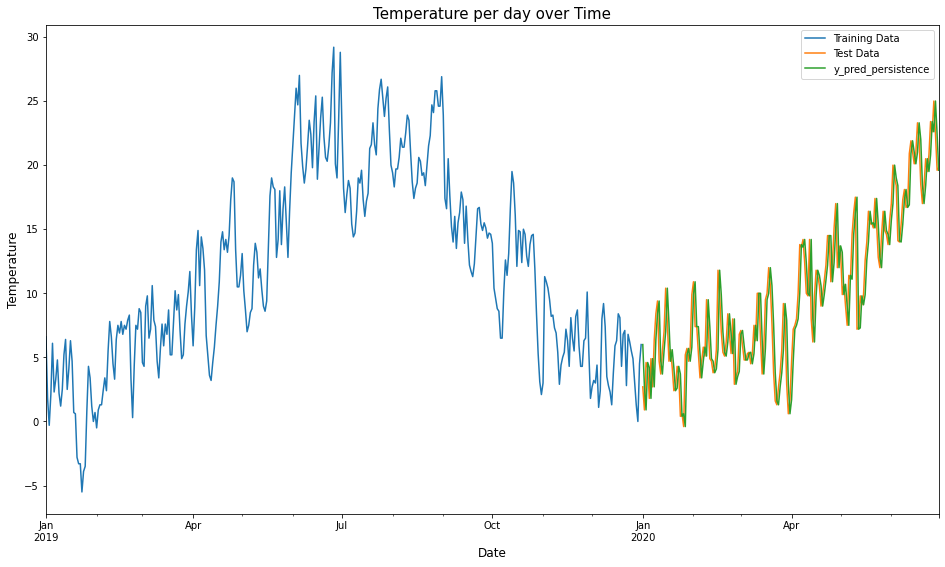

In [197]:
# Plot the prediction
plot_forecast(y_train["2019":], y_test, ['y_pred_persistence'])

# Compare their mean absolute errors

In [198]:
from sklearn.metrics import mean_absolute_error

In [199]:
for prediction in predictions:
    print(f'The mean absolute error of {prediction} is')
    print(f'{mean_absolute_error(y_test["TG"], y_test[prediction])}')
    print()

The mean absolute error of daily_means is
4.8655597150102645

The mean absolute error of y_pred_mean is
4.833582162679987

The mean absolute error of y_pred_mean_pct_change is
5.358813726758312

The mean absolute error of daily_mean_temp is
4.838908161117983

The mean absolute error of y_pred_daily_mean_pct is
6.253491791564244

The mean absolute error of y_pred_persistence is
1.875824175824176



## Baseline model